In [49]:
%matplotlib inline

import Quandl
import numpy as np
import pandas as pd
from datetime import datetime
import pandas.io.data as web

import cvxopt as opt
from cvxopt import blas, solvers

import matplotlib.pyplot as plt

ImportError: No module named cvxopt

In [6]:
dataset = Quandl.get(['WIKI/GOOG', 'WIKI/AAPL', 'WIKI/MSFT'], trim_start=datetime(2000,1,1), transformation='rdiff')

In [7]:
dataset = dataset[['WIKI.GOOG - Adj. Close', 'WIKI.AAPL - Adj. Close', 'WIKI.MSFT - Adj. Close']].dropna()

In [15]:
dataset.values.T.shape

(3, 252)

In [3]:
return_vec = np.random.randn(4, 1000)

In [27]:
return_vec.shape

(1000,)

In [10]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [11]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    return mu, sigma

In [12]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(dataset.values.T) 
    for _ in xrange(n_portfolios)
])

In [87]:
opt_mean, opt_std, best_score = 0, 0, -100
for i in range(500):
    if (means[i] - stds[i])[0] > best_score:
        opt_mean = means[i]
        opt_std = stds[i]
        best_score = (means[i] - stds[i])

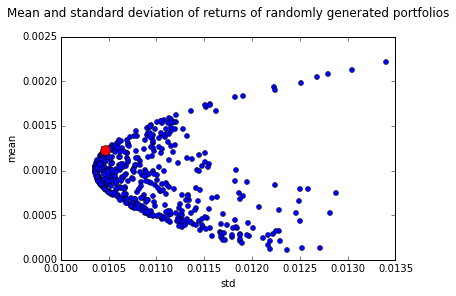

In [88]:
plt.plot(stds, means, 'o', markersize=5)
plt.plot(opt_std, opt_mean, 'o', color='r', markersize=10)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios\n')

## PCA

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(dataset.values)
pca.explained_variance_ratio_

array([ 0.55520483,  0.25012491,  0.19467026])

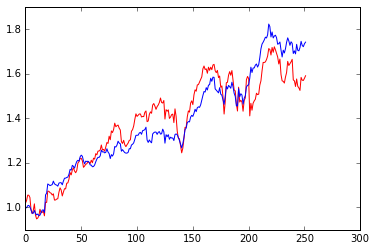

In [78]:
fund = (dataset.values * (1-pca.explained_variance_ratio_)).sum(axis=1)
fund = np.cumproduct(fund + 1)
plt.plot(fund, color='r')
plt.plot(np.cumproduct(1 + dataset['WIKI.AAPL - Adj. Close']))